#### Name: Qiwen Ma

Date: 13/5/2018

Version: 3.0

Environment: Python 3.6.0 and Jupyter notebook

Libraries used:
* pandas (for dataframe, included in Anaconda Python 3.6)
* re
* numpy
* matplotlib.pyplot

## 1.Introduction
This assignment find out the outliers and drop them.

The detail of each section is shown below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("dataset4_with_outliers.csv",encoding = "utf-8_sig")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,5437400630,20141016T000000,625000.0,4,2.25,1920,8259,2.0,0,0,4,8,1920,0,1979,0,98027,47.5616,-122.088
1,3999300290,20141016T000000,850000.0,3,3.50,2620,11148,2.0,0,4,4,9,2060,560,1977,0,98008,47.5845,-122.115
2,2525059134,20141016T000000,500000.0,2,1.50,1760,12000,1.0,0,0,4,7,1760,0,1964,0,98052,47.6288,-122.109
3,1862400285,20141016T000000,375000.0,3,1.00,1200,5404,1.0,0,0,3,6,1200,0,1937,0,98117,47.6969,-122.368
4,7199320190,20141016T000000,618000.0,4,2.25,2470,7350,1.0,0,0,3,7,1600,870,1978,0,98052,47.6936,-122.128


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9996 entries, 0 to 9995
Data columns (total 19 columns):
id               9996 non-null int64
date             9996 non-null object
price            9996 non-null float64
bedrooms         9996 non-null int64
bathrooms        9996 non-null float64
sqft_living      9996 non-null int64
sqft_lot         9996 non-null int64
floors           9996 non-null float64
waterfront       9996 non-null int64
view             9996 non-null int64
condition        9996 non-null int64
grade            9996 non-null int64
sqft_above       9996 non-null int64
sqft_basement    9996 non-null int64
yr_built         9996 non-null int64
yr_renovated     9996 non-null int64
zipcode          9996 non-null int64
lat              9996 non-null float64
long             9996 non-null float64
dtypes: float64(5), int64(13), object(1)
memory usage: 1.4+ MB


In [4]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
count,9.996000e+03,9.996000e+03,9996.000000,9996.000000,9996.000000,9.996000e+03,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000
mean,4.598579e+09,4.980468e+05,3.356943,2.082558,2025.039916,1.547281e+04,1.487345,0.002401,0.194678,3.374250,7.593037,1750.824930,274.214986,1972.056423,68.046919,98078.460984,47.555261,-122.212583
std,2.880071e+09,2.540477e+05,0.937060,0.736420,854.963922,4.297506e+04,0.540751,0.048943,0.679519,0.623769,1.112505,793.994317,418.925228,28.847071,362.111900,53.448592,0.142261,0.140801
min,1.000102e+06,8.995000e+04,1.000000,0.500000,390.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,4.000000,390.000000,0.000000,1900.000000,0.000000,98001.000000,47.162200,-122.519000
25%,2.126049e+09,3.200000e+05,3.000000,1.500000,1400.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1953.000000,0.000000,98033.000000,47.456775,-122.329000
50%,3.905060e+09,4.400000e+05,3.000000,2.250000,1870.000000,7.509500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1530.000000,0.000000,1976.000000,0.000000,98065.000000,47.563500,-122.228000
75%,7.371500e+09,6.100000e+05,4.000000,2.500000,2480.000000,1.036150e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2160.000000,520.000000,1998.000000,0.000000,98118.000000,47.679900,-122.122000
max,9.900000e+09,2.700000e+06,20.000000,6.500000,7880.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,13.000000,7880.000000,2610.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000


From the information above, there is no null values in each column. Then move on to further analyse the data by using the correlation of each column. The correlation is display below.

In [5]:
corr = data.corr().style.background_gradient().format("{:.2f}")
corr

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
id,1.00,-0.01,0.00,-0.00,-0.01,-0.15,0.02,-0.00,0.02,-0.02,0.01,-0.01,-0.01,0.02,-0.02,-0.00,-0.00,0.01
price,-0.01,1.00,0.32,0.54,0.72,0.13,0.30,0.04,0.30,-0.01,0.71,0.63,0.28,0.13,0.06,-0.03,0.37,0.07
bedrooms,0.00,0.32,1.00,0.47,0.56,0.03,0.16,-0.01,0.06,0.03,0.33,0.45,0.28,0.15,0.01,-0.13,-0.01,0.13
bathrooms,-0.00,0.54,0.47,1.00,0.74,0.11,0.50,0.00,0.15,-0.15,0.65,0.67,0.24,0.55,0.02,-0.21,0.00,0.24
sqft_living,-0.01,0.72,0.56,0.74,1.00,0.19,0.35,0.01,0.23,-0.08,0.75,0.87,0.39,0.35,0.02,-0.20,0.04,0.27
sqft_lot,-0.15,0.13,0.03,0.11,0.19,1.00,-0.01,0.04,0.09,-0.01,0.13,0.20,0.02,0.06,0.01,-0.13,-0.09,0.25
floors,0.02,0.30,0.16,0.50,0.35,-0.01,1.00,-0.01,0.01,-0.27,0.45,0.52,-0.27,0.52,-0.00,-0.06,0.04,0.12
waterfront,-0.00,0.04,-0.01,0.00,0.01,0.04,-0.01,1.00,0.25,0.01,0.01,-0.00,0.03,-0.04,0.08,0.04,-0.04,-0.06
view,0.02,0.30,0.06,0.15,0.23,0.09,0.01,0.25,1.00,0.03,0.20,0.13,0.24,-0.04,0.06,0.08,-0.00,-0.06
condition,-0.02,-0.01,0.03,-0.15,-0.08,-0.01,-0.27,0.01,0.03,1.00,-0.17,-0.17,0.16,-0.34,-0.06,-0.01,-0.05,-0.09


It is necessary to find the outliers by analysing the correlation between each column first. Since some data in one column will be considered to be outliers, but when it is connected to its related columns, it may seem to be much more normal. For example, if the the house has relatively high number of bedrooms comparing with other data in the same column, it may be considered outlier. But if it combine with the sqft_living, when the house is large, more bedrooms seem to become normal.  

In [6]:
remove_list = []

In [7]:
# For the sqft_above and sqft_basement, there are some data seem to be outliers as the sqft_above is smaller the sqft_basement and this is abnormal in real. 
for i in (data.sqft_above):
    if data.sqft_above[i] < data.sqft_basement[i]:
        print("inedx of to be detected:",i," the sqft_above is:",data.sqft_above[i],"the sqft_basement is:",data.sqft_basement[i])
        remove_list.append(i)

inedx of to be detected: 4900  the sqft_above is: 960 the sqft_basement is: 1320
inedx of to be detected: 6660  the sqft_above is: 1170 the sqft_basement is: 1230
inedx of to be detected: 1084  the sqft_above is: 850 the sqft_basement is: 910
inedx of to be detected: 4900  the sqft_above is: 960 the sqft_basement is: 1320


In [8]:
remove_list

[4900, 6660, 1084, 4900]

#### By observing the correlation table above, it can be found that:
1. Some columns have relatively low corrrlation with other columns. They are 'id','sqft_lot','floors','waterfront','view','condition',yr_built,'yr_renovated','zipcode','lat' and 'long'
2. The 'id' column is unique and it will not be further considered.
3. The 'sqft_above' and 'sqft_basement' are special as they can sum up to be 'sqft_living', so they will the normal data of these two columns left will be combined to be further considered by using 'sqft_living'.

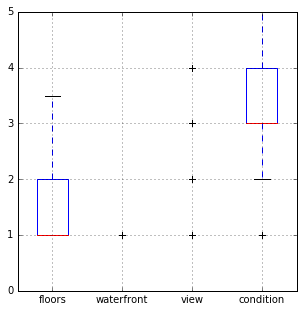

In [9]:
plt.figure(1,figsize=(5,5))
p = data[['floors','waterfront','view','condition']].boxplot()
plt.show()

It seems that the data in these column above are normal. No outlier in 'floors' column. The 'waterfront' has two classification and it is normal. The 'view' column has 5 classification and are normal. The columns left will be further plotted by using histograms below.

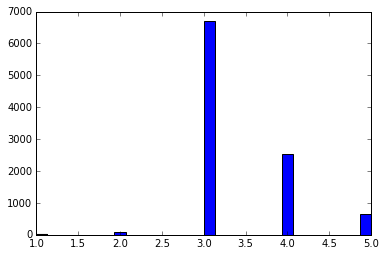

In [10]:
# From the histogram, it seems that the condition in 2 is not outliers and this column are normal.
plt.hist(data.condition,bins=30)
plt.show()

The histograms and the boxplots below shows that these columns are in normal distribution and are normal. There seem to be no outliers in these columns.

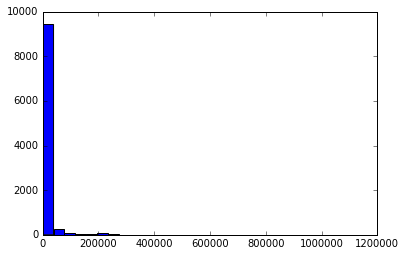

In [11]:
plt.hist(data.sqft_lot,bins=30)
plt.show()

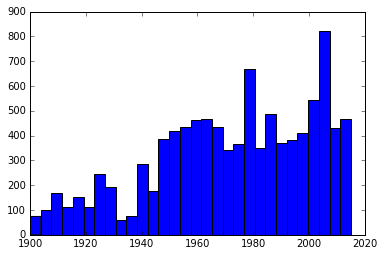

In [12]:
plt.hist(data.yr_built,bins=30)
plt.show()

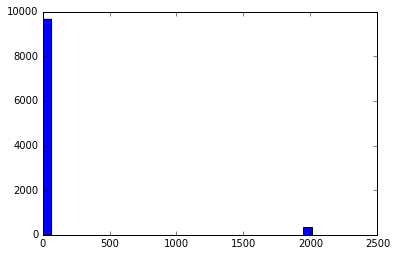

In [13]:
plt.hist(data.yr_renovated,bins=30)
plt.show()

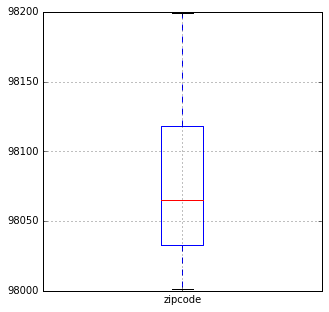

In [14]:
plt.figure(1,figsize=(5,5))
p = data[['zipcode']].boxplot()
plt.show()

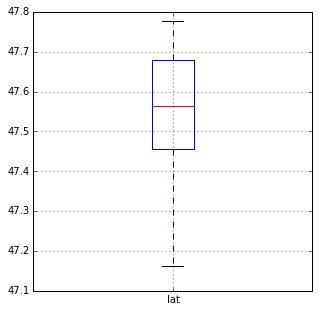

In [15]:
plt.figure(1,figsize=(5,5))
p = data[['lat']].boxplot()
plt.show()

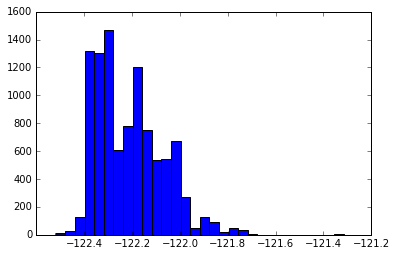

In [16]:
plt.hist(data.long,bins=30)
plt.show()

Following the analysis above, the columns that seems to have outliers and need to be further detected will be stored in the new dataframe. Thay are 'price','bedrooms','bathrooms','sqft_living','grade'.

In [17]:
df = data[['price','bedrooms','bathrooms','sqft_living','grade']]
df.head()

,price,bedrooms,bathrooms,sqft_living,grade
0,625000.0,4,2.25,1920,8
1,850000.0,3,3.50,2620,9
2,500000.0,2,1.50,1760,7
3,375000.0,3,1.00,1200,6
4,618000.0,4,2.25,2470,7


Since the 'price' and 'sqlt_living' are too large, they need to be normalized by using log. The data will be saved in the new dataframe.

In [18]:
df1 = df.copy()
df1.iloc[:,0] = np.log(df1.price)
df1.iloc[:,3] = np.log(df1.sqft_living)
df1.head()

,price,bedrooms,bathrooms,sqft_living,grade
0,13.345507,4,2.25,7.560080,8
1,13.652992,3,3.50,7.870930,9
2,13.122363,2,1.50,7.473069,7
3,12.834681,3,1.00,7.090077,6
4,13.334244,4,2.25,7.811973,7


In [19]:
# To further use the correlation table to analyse the columns in the new dataframe.
corr1 = df1.corr().style.background_gradient().format("{:.2f}")
corr1

,price,bedrooms,bathrooms,sqft_living,grade
price,1.00,0.33,0.54,0.68,0.70
bedrooms,0.33,1.00,0.47,0.59,0.33
bathrooms,0.54,0.47,1.00,0.75,0.65
sqft_living,0.68,0.59,0.75,1.00,0.73
grade,0.70,0.33,0.65,0.73,1.00


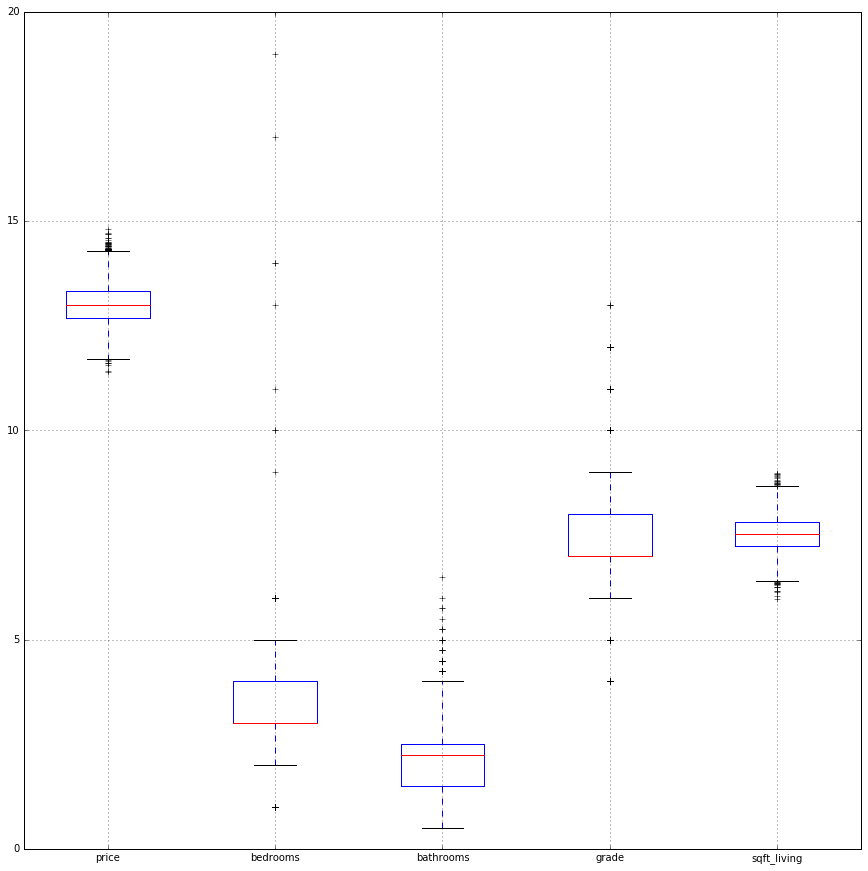

In [20]:
#It is also useful to use the boxplot to present the outliers
plt.figure(figsize=(15,15))
df1[['price','bedrooms','bathrooms','grade','sqft_living']].boxplot()
plt.show()

Combining the correlation table and the boxplot, the columns that are higher related and have outliers will be compared by pairs below.

### Compare the price and the sqft_living (the correlation number is 0.68 in the correlation table)

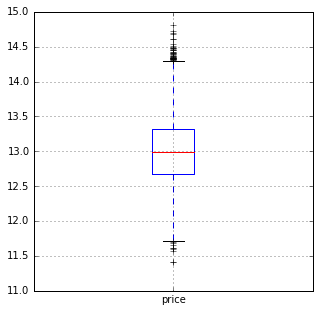

In [21]:
plt.figure(figsize=(5,5))
df1[['price']].boxplot()
plt.show()

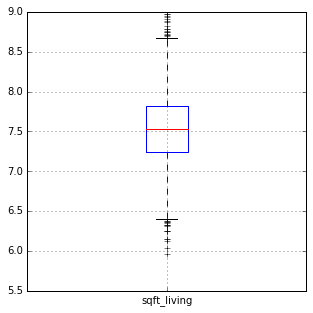

In [22]:
plt.figure(figsize=(5,5))
df1[['sqft_living']].boxplot()
plt.show()

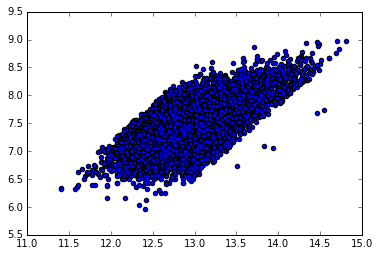

In [23]:
plt.scatter(df1.price,df1.sqft_living)
plt.show()

Combine the boxplots and find the outliers for both these two columns. 

In [24]:
detection = []
detection1 = []
for i, number in enumerate(df1.price):
    if number > 14.25 or number < 11.75:
        detection.append(i)
print("index of price to be detected",detection)
for j, number1 in enumerate(df1.sqft_living):
    if number1 >8.75 or number1 < 6.25:
        detection1.append(j)
print("index of sqft_living to be detected",detection1)
count = 0
for k in detection:
    if k in detection1:
        count +=1
        print("index be detected",k)
        remove_list.append(k)
print(count)

index of price to be detected [82, 196, 216, 262, 775, 793, 1174, 1248, 1727, 1867, 1881, 1989, 2135, 2188, 2190, 2194, 2273, 2298, 2414, 2678, 2933, 3075, 3496, 3522, 3628, 3777, 3784, 3821, 3853, 3899, 3933, 4040, 4200, 4242, 4277, 4305, 4308, 4464, 4468, 4514, 4526, 4576, 4705, 4726, 4737, 4824, 4887, 5135, 5181, 5524, 5671, 5727, 5752, 5922, 6078, 6128, 6193, 6317, 7028, 7051, 7391, 7418, 7594, 7723, 7987, 8108, 8313, 8475, 8496, 8498, 8680, 8734, 8869, 8967, 9173, 9429, 9463, 9647, 9871]
index of sqft_living to be detected [158, 1591, 1881, 2033, 2135, 3853, 4200, 4242, 4464, 4468, 4726, 5169, 5197, 5752, 7323, 8313, 9913]
index be detected 1881
index be detected 2135
index be detected 3853
index be detected 4200
index be detected 4242
index be detected 4464
index be detected 4468
index be detected 4726
index be detected 5752
index be detected 8313
10


In [25]:
print(remove_list)

[4900, 6660, 1084, 4900, 1881, 2135, 3853, 4200, 4242, 4464, 4468, 4726, 5752, 8313]


For further explore the scatter plot, it can find out some outliers that are not belong to the cluster.

In [26]:
detection = []
detection1 = []
for i, number in enumerate(df1.price):
    if number > 14.5:
        detection.append(i)
for j, number1 in enumerate(df1.sqft_living):
    if number1 < 8:
        detection1.append(j)
count = 0
for k in detection:
    if k in detection1:
        count +=1
        print("index be detected",k)
        remove_list.append(k)
print(count)

index be detected 8869
1


In [27]:
print(remove_list)

[4900, 6660, 1084, 4900, 1881, 2135, 3853, 4200, 4242, 4464, 4468, 4726, 5752, 8313, 8869]


In [28]:
detection = []
detection1 = []
for i, number in enumerate(df1.price):
    if number > 13.5:
        detection.append(i)
for j, number1 in enumerate(df1.sqft_living):
    if number1 < 7.25:
        detection1.append(j)
count = 0
for k in detection:
    if k in detection1:
        count +=1
        print("index be detected",k)
        remove_list.append(k)
print(count)

index be detected 8
index be detected 1060
index be detected 3623
index be detected 5072
4


In [29]:
print(remove_list)

[4900, 6660, 1084, 4900, 1881, 2135, 3853, 4200, 4242, 4464, 4468, 4726, 5752, 8313, 8869, 8, 1060, 3623, 5072]


### Compare the price and the grade(the correlation number is 0.7 in the correlation table)

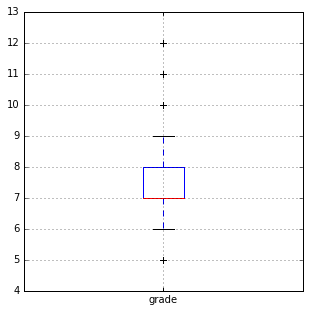

In [30]:
plt.figure(figsize=(5,5))
df1[['grade']].boxplot()
plt.show()

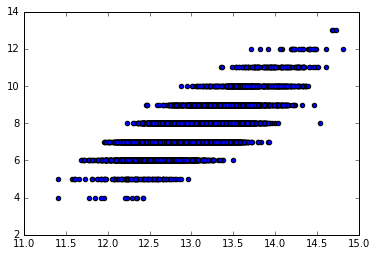

In [31]:
plt.scatter(df1.price,df1.grade)
plt.show()

In [32]:
detection = []
detection1 = []
for i, number in enumerate(df1.price):
    if number > 14.25 or number < 11.75:
        detection.append(i)
#print("index of price to be detected",detection)
for j, number1 in enumerate(df1.grade):
    if number1 >= 10 or number1 <= 5 :
        detection1.append(j)
#print("index of grade to be detected",detection1)
count = 0
for k in detection:
    if k in detection1:
        count +=1
        print("index be detected",k)
        remove_list.append(k)
print(count)

index be detected 82
index be detected 262
index be detected 775
index be detected 793
index be detected 1174
index be detected 1248
index be detected 1727
index be detected 1867
index be detected 1881
index be detected 1989
index be detected 2135
index be detected 2188
index be detected 2190
index be detected 2194
index be detected 2273
index be detected 2298
index be detected 2414
index be detected 2678
index be detected 2933
index be detected 3075
index be detected 3496
index be detected 3522
index be detected 3628
index be detected 3784
index be detected 3821
index be detected 3853
index be detected 3899
index be detected 3933
index be detected 4040
index be detected 4200
index be detected 4242
index be detected 4277
index be detected 4305
index be detected 4308
index be detected 4464
index be detected 4468
index be detected 4514
index be detected 4526
index be detected 4576
index be detected 4705
index be detected 4726
index be detected 4737
index be detected 4824
index be detecte

In [33]:
print(remove_list)

[4900, 6660, 1084, 4900, 1881, 2135, 3853, 4200, 4242, 4464, 4468, 4726, 5752, 8313, 8869, 8, 1060, 3623, 5072, 82, 262, 775, 793, 1174, 1248, 1727, 1867, 1881, 1989, 2135, 2188, 2190, 2194, 2273, 2298, 2414, 2678, 2933, 3075, 3496, 3522, 3628, 3784, 3821, 3853, 3899, 3933, 4040, 4200, 4242, 4277, 4305, 4308, 4464, 4468, 4514, 4526, 4576, 4705, 4726, 4737, 4824, 4887, 5135, 5181, 5524, 5671, 5727, 5752, 6078, 6128, 6193, 6317, 7028, 7051, 7391, 7418, 7594, 7723, 7987, 8108, 8313, 8475, 8498, 8734, 8967, 9173, 9429, 9647, 9871]


It can observe from the scatter that the total trend for price and grade is positive correlation, so the data that with higher price but lower grade is considerated to be outliers.

In [34]:
detection = []
detection1 = []
for i, number in enumerate(df1.price):
    if number > 14.25:
        detection.append(i)
#print("index of price to be detected",detection)
for j, number1 in enumerate(df1.grade):
    if number1 < 9:
        detection1.append(j)
#print("index of grade to be detected",detection1)
count = 0
for k in detection:
    if k in detection1:
        count +=1
        print("index be detected",k)
        remove_list.append(k)
print(count)

index be detected 8869
1


In [35]:
print(remove_list)

[4900, 6660, 1084, 4900, 1881, 2135, 3853, 4200, 4242, 4464, 4468, 4726, 5752, 8313, 8869, 8, 1060, 3623, 5072, 82, 262, 775, 793, 1174, 1248, 1727, 1867, 1881, 1989, 2135, 2188, 2190, 2194, 2273, 2298, 2414, 2678, 2933, 3075, 3496, 3522, 3628, 3784, 3821, 3853, 3899, 3933, 4040, 4200, 4242, 4277, 4305, 4308, 4464, 4468, 4514, 4526, 4576, 4705, 4726, 4737, 4824, 4887, 5135, 5181, 5524, 5671, 5727, 5752, 6078, 6128, 6193, 6317, 7028, 7051, 7391, 7418, 7594, 7723, 7987, 8108, 8313, 8475, 8498, 8734, 8967, 9173, 9429, 9647, 9871, 8869]


### Compare the bedrooms and the sqft_living(the correlation number is 0.59 in the correlation table)

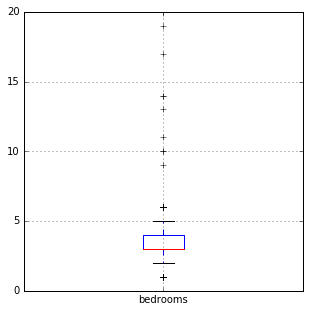

In [36]:
plt.figure(figsize=(5,5))
df1[['bedrooms']].boxplot()
plt.show()

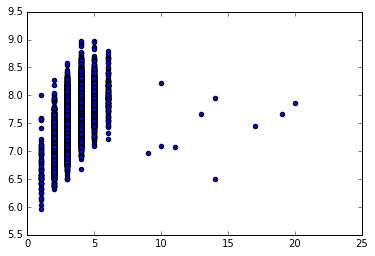

In [37]:
plt.scatter(df1.bedrooms,df1.sqft_living)
plt.show()

For the bedrooms and sqft_living, it can not just delete the outliers by using two boxplots. But for using the scatter plot, it is obvious that it has positive correlation between them. The larger the living area, the more bedrooms the house will have. And the outliers are clear displayed in the scatter.  

In [38]:
detection = []
detection1 = []
for i, number in enumerate(df1.bedrooms):
    if number > 6:
        detection.append(i)
#print("index of bedrooms to be detected",detection)
for j, number1 in enumerate(df1.sqft_living):
    if number1 < 8.25:
        detection1.append(j)
#print("index of sqft_living to be detected",detection1)
count = 0
for k in detection:
    if k in detection1:
        count +=1
        print("index be detected",k)
        remove_list.append(k)
print(count)

index be detected 161
index be detected 457
index be detected 2019
index be detected 2610
index be detected 2880
index be detected 4846
index be detected 7290
index be detected 8004
index be detected 9655
index be detected 9774
10


In [39]:
print(remove_list)

[4900, 6660, 1084, 4900, 1881, 2135, 3853, 4200, 4242, 4464, 4468, 4726, 5752, 8313, 8869, 8, 1060, 3623, 5072, 82, 262, 775, 793, 1174, 1248, 1727, 1867, 1881, 1989, 2135, 2188, 2190, 2194, 2273, 2298, 2414, 2678, 2933, 3075, 3496, 3522, 3628, 3784, 3821, 3853, 3899, 3933, 4040, 4200, 4242, 4277, 4305, 4308, 4464, 4468, 4514, 4526, 4576, 4705, 4726, 4737, 4824, 4887, 5135, 5181, 5524, 5671, 5727, 5752, 6078, 6128, 6193, 6317, 7028, 7051, 7391, 7418, 7594, 7723, 7987, 8108, 8313, 8475, 8498, 8734, 8967, 9173, 9429, 9647, 9871, 8869, 161, 457, 2019, 2610, 2880, 4846, 7290, 8004, 9655, 9774]


Then at the same time, if the house has large living area but with very low number of bedrooms, it may be the outliers.

In [40]:
detection = []
detection1 = []
for i, number in enumerate(df1.bedrooms):
    if number < 2:
        detection.append(i)
#print("index of bedrooms to be detected",detection)
for j, number1 in enumerate(df1.sqft_living):
    if number1 >= 8:
        detection1.append(j)
#print("index of sqft_living to be detected",detection1)
count = 0
for k in detection:
    if k in detection1:
        count +=1
        print("index be detected",k)
        remove_list.append(k)
print(count)

index be detected 2737
1


In [41]:
print(remove_list)

[4900, 6660, 1084, 4900, 1881, 2135, 3853, 4200, 4242, 4464, 4468, 4726, 5752, 8313, 8869, 8, 1060, 3623, 5072, 82, 262, 775, 793, 1174, 1248, 1727, 1867, 1881, 1989, 2135, 2188, 2190, 2194, 2273, 2298, 2414, 2678, 2933, 3075, 3496, 3522, 3628, 3784, 3821, 3853, 3899, 3933, 4040, 4200, 4242, 4277, 4305, 4308, 4464, 4468, 4514, 4526, 4576, 4705, 4726, 4737, 4824, 4887, 5135, 5181, 5524, 5671, 5727, 5752, 6078, 6128, 6193, 6317, 7028, 7051, 7391, 7418, 7594, 7723, 7987, 8108, 8313, 8475, 8498, 8734, 8967, 9173, 9429, 9647, 9871, 8869, 161, 457, 2019, 2610, 2880, 4846, 7290, 8004, 9655, 9774, 2737]


### Compare the bathrooms and the sqft_living(the correlation number is 0.75 in the correlation table)

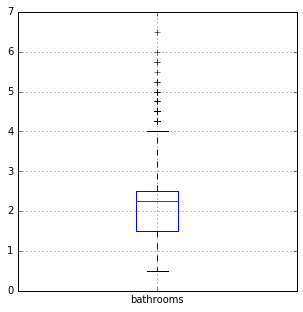

In [42]:
plt.figure(figsize=(5,5))
df1[['bathrooms']].boxplot()
plt.show()

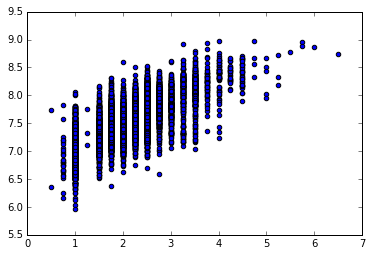

In [43]:
plt.scatter(df1.bathrooms,df1.sqft_living)
plt.show()

The same as bedrooms and sqft_living above, it can be more clear for displaying the outliers between bathrooms and sqft_living in the scatter.

In [44]:
detection = []
detection1 = []
for i, number in enumerate(df1.bathrooms):
    if number > 6:
        detection.append(i)
for j, number1 in enumerate(df1.sqft_living):
    if number1 < 9:
        detection1.append(j)
count = 0
for k in detection:
    if k in detection1:
        count +=1
        print("index be detected",k)
        remove_list.append(k)
print(count)

index be detected 7196
1


In [45]:
print(remove_list)

[4900, 6660, 1084, 4900, 1881, 2135, 3853, 4200, 4242, 4464, 4468, 4726, 5752, 8313, 8869, 8, 1060, 3623, 5072, 82, 262, 775, 793, 1174, 1248, 1727, 1867, 1881, 1989, 2135, 2188, 2190, 2194, 2273, 2298, 2414, 2678, 2933, 3075, 3496, 3522, 3628, 3784, 3821, 3853, 3899, 3933, 4040, 4200, 4242, 4277, 4305, 4308, 4464, 4468, 4514, 4526, 4576, 4705, 4726, 4737, 4824, 4887, 5135, 5181, 5524, 5671, 5727, 5752, 6078, 6128, 6193, 6317, 7028, 7051, 7391, 7418, 7594, 7723, 7987, 8108, 8313, 8475, 8498, 8734, 8967, 9173, 9429, 9647, 9871, 8869, 161, 457, 2019, 2610, 2880, 4846, 7290, 8004, 9655, 9774, 2737, 7196]


The data with very less bathrooms but with large living area may be considerated outliers.

In [46]:
detection = []
detection1 = []
for i, number in enumerate(df1.bathrooms):
    if number <= 0.75:
        detection.append(i)
for j, number1 in enumerate(df1.sqft_living):
    if number1 > 7.5:
        detection1.append(j)
count = 0
for k in detection:
    if k in detection1:
        count +=1
        print("index be detected",k)
        remove_list.append(k)
print(count)

index be detected 2907
index be detected 3349
index be detected 6358
3


In [47]:
print(remove_list)

[4900, 6660, 1084, 4900, 1881, 2135, 3853, 4200, 4242, 4464, 4468, 4726, 5752, 8313, 8869, 8, 1060, 3623, 5072, 82, 262, 775, 793, 1174, 1248, 1727, 1867, 1881, 1989, 2135, 2188, 2190, 2194, 2273, 2298, 2414, 2678, 2933, 3075, 3496, 3522, 3628, 3784, 3821, 3853, 3899, 3933, 4040, 4200, 4242, 4277, 4305, 4308, 4464, 4468, 4514, 4526, 4576, 4705, 4726, 4737, 4824, 4887, 5135, 5181, 5524, 5671, 5727, 5752, 6078, 6128, 6193, 6317, 7028, 7051, 7391, 7418, 7594, 7723, 7987, 8108, 8313, 8475, 8498, 8734, 8967, 9173, 9429, 9647, 9871, 8869, 161, 457, 2019, 2610, 2880, 4846, 7290, 8004, 9655, 9774, 2737, 7196, 2907, 3349, 6358]


### Compare the bathrooms and the grade (the correlation number is 0.65 in the correlation table)

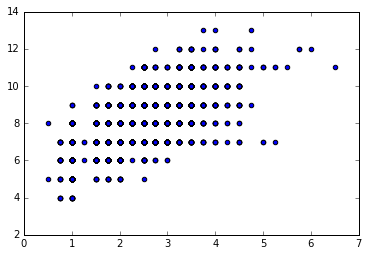

In [48]:
plt.scatter(df1.bathrooms,df1.grade)
plt.show()

In [49]:
detection = []
detection1 = []
for i, number in enumerate(df1.bathrooms):
    if number > 6:
        detection.append(i)
for j, number1 in enumerate(df1.sqft_living):
    if number1 < 12:
        detection1.append(j)
count = 0
for k in detection:
    if k in detection1:
        count +=1
        print("index be detected",k)
        remove_list.append(k)
print(count)

index be detected 7196
1


In [50]:
print(remove_list)

[4900, 6660, 1084, 4900, 1881, 2135, 3853, 4200, 4242, 4464, 4468, 4726, 5752, 8313, 8869, 8, 1060, 3623, 5072, 82, 262, 775, 793, 1174, 1248, 1727, 1867, 1881, 1989, 2135, 2188, 2190, 2194, 2273, 2298, 2414, 2678, 2933, 3075, 3496, 3522, 3628, 3784, 3821, 3853, 3899, 3933, 4040, 4200, 4242, 4277, 4305, 4308, 4464, 4468, 4514, 4526, 4576, 4705, 4726, 4737, 4824, 4887, 5135, 5181, 5524, 5671, 5727, 5752, 6078, 6128, 6193, 6317, 7028, 7051, 7391, 7418, 7594, 7723, 7987, 8108, 8313, 8475, 8498, 8734, 8967, 9173, 9429, 9647, 9871, 8869, 161, 457, 2019, 2610, 2880, 4846, 7290, 8004, 9655, 9774, 2737, 7196, 2907, 3349, 6358, 7196]


In [51]:
detection = []
detection1 = []
for i, number in enumerate(df1.bathrooms):
    if number <= 0.75:
        detection.append(i)
for j, number1 in enumerate(df1.grade):
    if number1 >= 8:
        detection1.append(j)
count = 0
for k in detection:
    if k in detection1:
        count +=1
        print("index be detected",k)
        remove_list.append(k)
print(count)

index be detected 2907
1


In [52]:
print(remove_list)

[4900, 6660, 1084, 4900, 1881, 2135, 3853, 4200, 4242, 4464, 4468, 4726, 5752, 8313, 8869, 8, 1060, 3623, 5072, 82, 262, 775, 793, 1174, 1248, 1727, 1867, 1881, 1989, 2135, 2188, 2190, 2194, 2273, 2298, 2414, 2678, 2933, 3075, 3496, 3522, 3628, 3784, 3821, 3853, 3899, 3933, 4040, 4200, 4242, 4277, 4305, 4308, 4464, 4468, 4514, 4526, 4576, 4705, 4726, 4737, 4824, 4887, 5135, 5181, 5524, 5671, 5727, 5752, 6078, 6128, 6193, 6317, 7028, 7051, 7391, 7418, 7594, 7723, 7987, 8108, 8313, 8475, 8498, 8734, 8967, 9173, 9429, 9647, 9871, 8869, 161, 457, 2019, 2610, 2880, 4846, 7290, 8004, 9655, 9774, 2737, 7196, 2907, 3349, 6358, 7196, 2907]


### Compare the grade and the sqft_living (the correlation number is 0.73 in the correlation table)

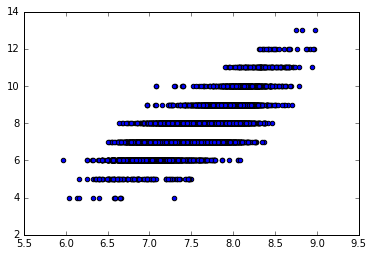

In [53]:
plt.scatter(df1.sqft_living,df1.grade)
plt.show()

In [54]:
detection = []
detection1 = []
for i, number in enumerate(df1.sqft_living):
    if number <= 6:
        detection.append(i)
for j, number1 in enumerate(df1.grade):
    if number1 >= 6:
        detection1.append(j)
count = 0
for k in detection:
    if k in detection1:
        count +=1
        print("index be detected",k)
        remove_list.append(k)
print(count)

index be detected 9913
1


In [55]:
print(remove_list)

[4900, 6660, 1084, 4900, 1881, 2135, 3853, 4200, 4242, 4464, 4468, 4726, 5752, 8313, 8869, 8, 1060, 3623, 5072, 82, 262, 775, 793, 1174, 1248, 1727, 1867, 1881, 1989, 2135, 2188, 2190, 2194, 2273, 2298, 2414, 2678, 2933, 3075, 3496, 3522, 3628, 3784, 3821, 3853, 3899, 3933, 4040, 4200, 4242, 4277, 4305, 4308, 4464, 4468, 4514, 4526, 4576, 4705, 4726, 4737, 4824, 4887, 5135, 5181, 5524, 5671, 5727, 5752, 6078, 6128, 6193, 6317, 7028, 7051, 7391, 7418, 7594, 7723, 7987, 8108, 8313, 8475, 8498, 8734, 8967, 9173, 9429, 9647, 9871, 8869, 161, 457, 2019, 2610, 2880, 4846, 7290, 8004, 9655, 9774, 2737, 7196, 2907, 3349, 6358, 7196, 2907, 9913]


In [56]:
detection = []
detection1 = []
for i, number in enumerate(df1.sqft_living):
    if number > 7:
        detection.append(i)
for j, number1 in enumerate(df1.grade):
    if number1 <= 4:
        detection1.append(j)
count = 0
for k in detection:
    if k in detection1:
        count +=1
        print("index be detected",k)
        remove_list.append(k)
print(count)

index be detected 1158
1


In [57]:
print(remove_list)

[4900, 6660, 1084, 4900, 1881, 2135, 3853, 4200, 4242, 4464, 4468, 4726, 5752, 8313, 8869, 8, 1060, 3623, 5072, 82, 262, 775, 793, 1174, 1248, 1727, 1867, 1881, 1989, 2135, 2188, 2190, 2194, 2273, 2298, 2414, 2678, 2933, 3075, 3496, 3522, 3628, 3784, 3821, 3853, 3899, 3933, 4040, 4200, 4242, 4277, 4305, 4308, 4464, 4468, 4514, 4526, 4576, 4705, 4726, 4737, 4824, 4887, 5135, 5181, 5524, 5671, 5727, 5752, 6078, 6128, 6193, 6317, 7028, 7051, 7391, 7418, 7594, 7723, 7987, 8108, 8313, 8475, 8498, 8734, 8967, 9173, 9429, 9647, 9871, 8869, 161, 457, 2019, 2610, 2880, 4846, 7290, 8004, 9655, 9774, 2737, 7196, 2907, 3349, 6358, 7196, 2907, 9913, 1158]


To make the index to of outliers in the list without duplication.

In [58]:
new_remove_list = sorted(set(remove_list), key = remove_list.index)
print(new_remove_list)
print("To remove:", len(new_remove_list))

[4900, 6660, 1084, 1881, 2135, 3853, 4200, 4242, 4464, 4468, 4726, 5752, 8313, 8869, 8, 1060, 3623, 5072, 82, 262, 775, 793, 1174, 1248, 1727, 1867, 1989, 2188, 2190, 2194, 2273, 2298, 2414, 2678, 2933, 3075, 3496, 3522, 3628, 3784, 3821, 3899, 3933, 4040, 4277, 4305, 4308, 4514, 4526, 4576, 4705, 4737, 4824, 4887, 5135, 5181, 5524, 5671, 5727, 6078, 6128, 6193, 6317, 7028, 7051, 7391, 7418, 7594, 7723, 7987, 8108, 8475, 8498, 8734, 8967, 9173, 9429, 9647, 9871, 161, 457, 2019, 2610, 2880, 4846, 7290, 8004, 9655, 9774, 2737, 7196, 2907, 3349, 6358, 9913, 1158]
To remove: 96


In [59]:
result = data.copy()
result = result.drop(result.index[new_remove_list])
result

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,5437400630,20141016T000000,625000.0,4,2.25,1920,8259,2.0,0,0,4,8,1920,0,1979,0,98027,47.5616,-122.088
1,3999300290,20141016T000000,850000.0,3,3.50,2620,11148,2.0,0,4,4,9,2060,560,1977,0,98008,47.5845,-122.115
2,2525059134,20141016T000000,500000.0,2,1.50,1760,12000,1.0,0,0,4,7,1760,0,1964,0,98052,47.6288,-122.109
3,1862400285,20141016T000000,375000.0,3,1.00,1200,5404,1.0,0,0,3,6,1200,0,1937,0,98117,47.6969,-122.368
4,7199320190,20141016T000000,618000.0,4,2.25,2470,7350,1.0,0,0,3,7,1600,870,1978,0,98052,47.6936,-122.128
5,8815400670,20141016T000000,780000.0,3,2.00,2610,6000,1.0,0,0,5,7,1310,1300,1941,0,98115,47.6750,-122.289
6,1568100380,20141016T000000,345000.0,2,1.00,1160,8504,1.0,0,0,4,7,1160,0,1949,0,98155,47.7364,-122.295
7,5561000430,20141016T000000,470000.0,3,2.25,1830,39165,1.0,0,0,5,8,1830,0,1963,0,98027,47.4612,-121.992
9,305010190,20141016T000000,680000.0,4,2.50,2830,8399,2.0,0,0,3,9,2830,0,1998,0,98075,47.5851,-122.034
10,1924079090,20141016T000000,530000.0,3,2.75,2440,45738,2.0,0,0,3,8,1840,600,1987,0,98027,47.5453,-121.957


In [61]:
result1 = result.set_index('id', inplace = False)

In [63]:
result1.to_csv('dataset4_solution.csv',encoding = "utf-8_sig") 

## Summery

1. The combination of using various methods like boxplots and scatters to find out the outliers. The observation is important as each data column has different values range and characteristics.
2. It is also important to use the correlation table to find out the relation between the data and make further observation.